# AMS 598 Project 1

In this project, you will delve into logistic regression to reinforce your understanding of key principles covered in the lectures. This assignment is designed to be hands-on, promoting the practical application of the concepts discussed. You are to fill in the empty code blocks to complete this assignment (necessary modifications may be needed, such as changing the data directory path depending on where you place the data).

Problem 1:

(1) Write your own code in the *prepare_X* function under **Data Preprocessing**

(2) Modify the code for *prepare_y* under **Data Preprocessing**.

(3) Implement *visualize_features* under **Main**

(4) Test your code in the "Data Preprocessing" section in the *main* function under **Main**.

Problem 2:

(1) Write your own code for *fit_GD*, *fit_SGD*, *_gradient*, *predict*, *score*, and *predict_proba* functions under **Logistic Regression**

(2) Implement *visualize_result* under **Main**

(3) Test your code in the "Logistic Regression Sigmoid Case" in the *main* function under **Main**

### Data Preprocessing

In [94]:
import numpy as np

"""This script implements the functions for reading data.
"""

def load_data(filename):
    """Load a given txt file.

    Args:
        filename: A string.

    Returns:
        raw_data: An array of shape [n_samples, 256].
        labels : An array of shape [n_samples,].

    """
    data= np.load(filename)
    x= data['x']
    y= data['y']
    return x, y

def train_valid_split(raw_data, labels, split_index):
    """Split the original training data into a new training dataset
    and a validation dataset.
    n_samples = n_train_samples + n_valid_samples

    Args:
        raw_data: An array of shape [n_samples, 256].
        labels : An array of shape [n_samples,].
        split_index: An integer.

    """
    return raw_data[:split_index], raw_data[split_index:], labels[:split_index], labels[split_index:]

def prepare_X(raw_X):
    """Extract features from raw_X as required.

    Args:
        raw_X: An array of shape [n_samples, 256].

    Returns:
        X: An array of shape [n_samples, n_features].
    """
    raw_image = raw_X.reshape((-1, 16, 16))

    # Feature 1: Measure of Symmetry
    ### YOUR CODE HERE
    flipped_image = np.flip(raw_image, axis=2)
    difference = abs(raw_image -flipped_image)
    symmetry_measure = -np.sum(difference, axis = (1,2)) / 256
    ### END YOUR CODE

    # Feature 2: Measure of Intensity
    ### YOUR CODE HERE
    intensity_measure = np.sum(raw_image,axis=(1,2))/256
    ### END YOUR CODE

    # Feature 3: Bias Term. Always 1.
    ### YOUR CODE HERE
    bias = np.ones(raw_image.shape[0])
    ### END YOUR CODE

    # Stack features together in the following order.
    # [Feature 3, Feature 1, Feature 2]
    ### YOUR CODE HERE
    X = np.stack((bias,symmetry_measure,intensity_measure),axis=1)

    ### END YOUR CODE
    return X

def prepare_y(raw_y):
    """
    Args:
        raw_y: An array of shape [n_samples,].

    Returns:
        y: An array of shape [n_samples,].
        idx:return idx for data label 1 and 2.
    """
    y = raw_y
    idx = np.where((raw_y==1) | (raw_y==2))
    y[np.where(raw_y==0)] = 0
    y[np.where(raw_y==1)] = 1
    y[np.where(raw_y==2)] = 2

    return y, idx

### Logistic Regression

In [114]:
import numpy as np
import sys

"""This script implements a two-class logistic regression model.
"""

class logistic_regression(object):

    def __init__(self, learning_rate, max_iter):
        self.learning_rate = learning_rate
        self.max_iter = max_iter

    def fit_GD(self, X, y):
        #print("entered fit_GD")
        """Train perceptron model on data (X,y) with Gradient Descent.

        Args:
            X: An array of shape [n_samples, n_features].
            y: An array of shape [n_samples,]. Only contains 1 or -1.

        Returns:
            self: Returns an instance of self.
        """
        n_samples, n_features = X.shape

        ### YOUR CODE HERE

        self.W = np.zeros(n_features)

        for _ in range(self.max_iter):
          gradient = np.zeros(n_features)
          for i in range(n_samples):
            gradient = gradient + self._gradient(X[i],y[i])
          #self.W = self.W - self.learning_rate * gradient/n_samples
          self.W -= self.learning_rate * gradient/n_samples
        ### END YOUR CODE
        return self


    def fit_SGD(self, X, y):
        """Train perceptron model on data (X,y) with Stochastic Gradient Descent.

        Args:
            X: An array of shape [n_samples, n_features].
            y: An array of shape [n_samples,]. Only contains 1 or -1.

        Returns:
            self: Returns an instance of self.
        """
        #print("fit SGD entered")
        ### YOUR CODE HERE
        n_samples, n_features = X.shape

        self.W = np.zeros(n_features)
        for _ in range(self.max_iter):
          indices = np.arange(n_samples)
          np.random.shuffle(indices)
          X_shuffled = X[indices]
          y_shuffled = y[indices]

          for _x, _y in zip(X_shuffled, y_shuffled):
            self.W -= self.learning_rate * self._gradient(_x, _y)

        ### END YOUR CODE
        return self

    def _gradient(self, _x, _y):
        """Compute the gradient of cross-entropy with respect to self.W
        for one training sample (_x, _y). This function is used in fit_*.

        Args:
            _x: An array of shape [n_features,].
            _y: An integer. 1 or -1.

        Returns:
            _g: An array of shape [n_features,]. The gradient of
                cross-entropy with respect to self.W.
        """
        ### YOUR CODE HERE

        z = np.dot(self.W, _x)
        sigmoid = 1 / (1 + np.exp(-_y*z))
        _g = -_y * (1-sigmoid) * _x

        #_g = (_y - sigmoid) * _x
        return _g


        ### END YOUR CODE

    def get_params(self):
        """Get parameters for this perceptron model.

        Returns:
            W: An array of shape [n_features,].
        """
        if self.W is None:
            print("Run fit first!")
            sys.exit(-1)
        return self.W

    def predict_proba(self, X):
        """Predict class probabilities for samples in X.

        Args:
            X: An array of shape [n_samples, n_features].

        Returns:
            preds_proba: An array of shape [n_samples, 2].
                Only contains floats between [0,1].
        """
        ### YOUR CODE HERE

        z = np.dot(X, self.W)
        # Apply the sigmoid function to get probabilities for class 1
        prob_class_1 = self.sigmoid(z)
        # Probabilities for class -1 can be derived as (1 - prob_class_1)
        prob_class_0 = 1 - prob_class_1

        # Combine probabilities into a single array
        preds_proba = np.vstack((prob_class_0, prob_class_1)).transpose()

        return preds_proba



        ### END YOUR CODE


    def predict(self, X):
        """Predict class labels for samples in X.

        Args:
            X: An array of shape [n_samples, n_features].

        Returns:
            preds: An array of shape [n_samples,]. Only contains 1 or -1.
        """
        ### YOUR CODE HERE

        preds = np.where(self.predict_proba(X)[:,1] > 0.5,1,-1)

        return preds




        ### END YOUR CODE

    def score(self, X, y):
        """Returns the mean accuracy on the given test data and labels.

        Args:
            X: An array of shape [n_samples, n_features].
            y: An array of shape [n_samples,]. Only contains 1 or -1.

        Returns:
            score: An float. Mean accuracy of self.predict(X) wrt. y.
        """
        ### YOUR CODE HERE

        score = np.mean(self.predict(X)==y)

        return score


        ### END YOUR CODE

    def assign_weights(self, weights):
        self.W = weights
        return self

    def sigmoid(self,x):
      return 1/(1+np.exp(-x))


### Main

-----------------------------
Question 1
Generate feature and save figure
-----------------------------
-----------------------------
Question 2(a,b,c)
Check GD, SGD
-----------------------------
Gradient Descent Parameters
[ 0.18761413  3.55944904 -2.06327285]
Gradient  Score
0.9444444444444444
Gradient Descent Validation Prediction
[-1  1 -1  1 -1 -1 -1 -1 -1]
Stochastic Gradient Descent Parameters
[11.38656866 31.83554981  1.89938602]
Stochastic Gradient Score
0.9703703703703703
Stochastic Gradient Validation Prediciton
[-1  1 -1  1  1 -1 -1 -1 -1]
-----------------------------
Question 2(d)
Grid search hyper-parameters
-----------------------------
Best learning rate
0.1
Best max iteration
200
Best score
0.9725925925925926
-----------------------------
Question 2(e)
Visualize the best model and save figure
-----------------------------


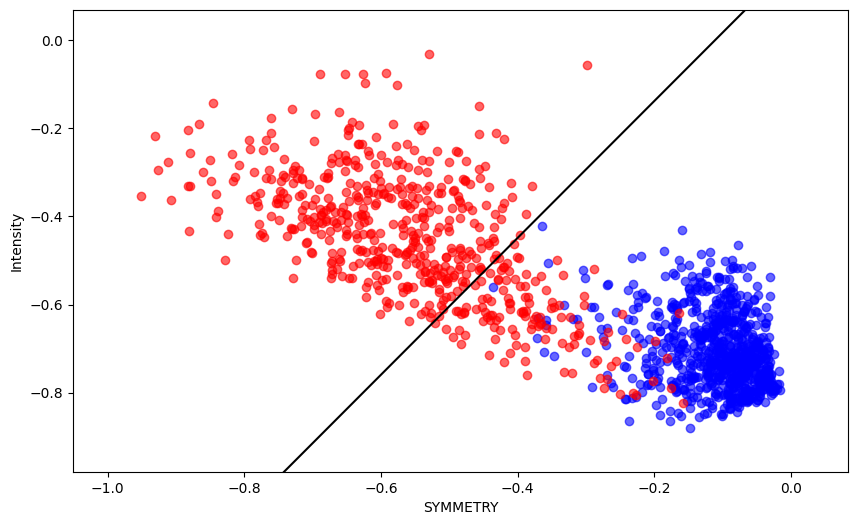

In [123]:
import os
import matplotlib.pyplot as plt

data_dir = ""
train_filename = "training.npz"
test_filename = "test.npz"

def sigmmoid(self,x):
    return 1/(1+np.exp(-x))

def visualize_features(X, y):
    '''This function is used to plot a 2-D scatter plot of training features.

    Args:
        X: An array of shape [n_samples, 2].
        y: An array of shape [n_samples,]. Only contains 1 or -1.

    Returns:
        No return. Save the plot to 'train_features.*' and include it
        in submission.
    '''
    ### YOUR CODE HERE
    plt.figure(figsize=(10, 6))

    # Scatter plot for each class
    plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', label='Class 1', alpha=0.6)
    plt.scatter(X[y == -1, 0], X[y == -1, 1], color='red', label='Class -1', alpha=0.6)

    # Add labels and title
    plt.xlabel('Symmetry')
    plt.ylabel('Intensity')
    plt.title('2D Scatter Plot of Training Features')
    plt.legend()

    # Save the plot
    plt.savefig('train_features.png')
    plt.close()

    ### END YOUR CODE

def visualize_result(X, y, W):
    '''This function is used to plot the sigmoid model after training.

    Args:
        X: An array of shape [n_samples, 2].
        y: An array of shape [n_samples,]. Only contains 1 or -1.
        W: An array of shape [n_features,].

    Returns:
        No return. Save the plot to 'train_result_sigmoid.*' and include it
        in submission.
    '''
    ### YOUR CODE HERE
    plt.figure(figsize=(10, 6))

    # Scatter plot for each class
    plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', label='Class 1', alpha=0.6)
    plt.scatter(X[y == -1, 0], X[y == -1, 1], color='red', label='Class -1', alpha=0.6)


    c = -W[0]/W[2]
    m = -W[1]/W[2]
    x_min, x_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
    y_min, y_max = X[:,1].min() - 0.1, X[:,1].max() + 0.1
    x_in = np.array([x_min, x_max])
    y_in = m * x_in + c
    plt.plot(x_in, y_in, color='black')
    # Add labels and title
    plt.xlabel('SYMMETRY')
    plt.ylabel('Intensity')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.savefig('best_model.png')



    ### END YOUR CODE


def main():
    # ------------Data Preprocessing------------
    # Read data for training.

    raw_data, labels = load_data(os.path.join(data_dir, train_filename))
    raw_train, raw_valid, label_train, label_valid = train_valid_split(raw_data, labels, 2300)

    ##### Preprocess raw data to extract features
    train_X_all = prepare_X(raw_train)
    valid_X_all = prepare_X(raw_valid)
    ##### Preprocess labels for all data to 0,1,2 and return the idx for data from '1' and '2' class.
    train_y_all, train_idx = prepare_y(label_train)
    valid_y_all, val_idx = prepare_y(label_valid)

    ####### For binary case, only use data from '1' and '2'
    train_X = train_X_all[train_idx]
    train_y = train_y_all[train_idx]
    ####### Only use the first 1350 data examples for binary training.
    train_X = train_X[0:1350]
    train_y = train_y[0:1350]
    valid_X = valid_X_all[val_idx]
    valid_y = valid_y_all[val_idx]
    ####### set lables to  1 and -1. Here convert label '2' to '-1' which means we treat data '1' as postitive class.
    train_y[np.where(train_y==2)] = -1
    valid_y[np.where(valid_y==2)] = -1
    data_shape= train_y.shape[0]

    ## Visualize training data.
    print('-----------------------------')
    print('Question 1')
    print('Generate feature and save figure')
    print('-----------------------------')
    visualize_features(train_X[:, 1:3], train_y)


   # ------------Logistic Regression Sigmoid Case------------

   ##### Check GD, SGD
    print('-----------------------------')
    print('Question 2(a,b,c)')
    print('Check GD, SGD')
    print('-----------------------------')
    logisticR_classifier = logistic_regression(learning_rate=0.5, max_iter=100)


    logisticR_classifier.fit_GD(train_X, train_y)
    print("Gradient Descent Parameters")
    print(logisticR_classifier.get_params())
    print("Gradient  Score")
    print(logisticR_classifier.score(train_X, train_y))

    #validation
    print("Gradient Descent Validation Prediction")
    print(logisticR_classifier.predict(valid_X[0:9]))

    logisticR_classifier.fit_SGD(train_X, train_y)
    print("Stochastic Gradient Descent Parameters")
    print(logisticR_classifier.get_params())
    print("Stochastic Gradient Score")
    print(logisticR_classifier.score(train_X, train_y))

    #validation
    print("Stochastic Gradient Validation Prediciton")
    print(logisticR_classifier.predict(valid_X[0:9]))


    # Explore different hyper-parameters.
    print('-----------------------------')
    print('Question 2(d)')
    print('Grid search hyper-parameters')
    print('-----------------------------')
    learning_rate = [0.1, 0.2, 0.5]
    max_iter = [100, 200]

    ### YOUR CODE HERE

    best_score = 0
    best_lr = learning_rate[0]
    best_mi = max_iter[0]

    for lr in learning_rate:
      for mi in max_iter:
        logisticR_classifier = logistic_regression(learning_rate=lr, max_iter=mi)
        logisticR_classifier.fit_SGD(train_X, train_y)
        score = logisticR_classifier.score(train_X, train_y)
        if score > best_score:
          best_score = score
          best_lr = lr
          best_mi = mi

    print("Best learning rate")
    print(best_lr)
    print("Best max iteration")
    print(best_mi)
    print("Best score")
    print(best_score)





    ### END YOUR CODE

    # Visualize the your 'best' model after training.
    # visualize_result(train_X[:, 1:3], train_y, best_logisticR.get_params())
    print('-----------------------------')
    print('Question 2(e)')
    print('Visualize the best model and save figure')
    print('-----------------------------')

    ### YOUR CODE HERE

    best_logisticR = logistic_regression(learning_rate = best_lr, max_iter = best_mi)
    best_logisticR.fit_GD(train_X, train_y)
    visualize_result(train_X[:, 1:3], train_y, best_logisticR.get_params())





    ### END YOUR CODE




    # ------------End------------


if __name__ == '__main__':
    main()

